<a href="https://colab.research.google.com/github/sotetsuk/LectureColab/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

## Lassoの実装

In [2]:
def soft_thresholding(x, lambda_):
    if x > lambda_:
        return x - lambda_
    elif x < -lambda_:
        return x + lambda_
    else:
        return 0


def lasso_regression(X, y, alpha=1.0, max_iter=1000, tol=1e-4):
    n_samples, n_features = X.shape

    # データの標準化
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1  # ゼロ除算回避
    y_mean = np.mean(y)
    X = (X - X_mean) / X_std
    y = y - y_mean

    # 座標降下法（CD）による推定
    w = np.zeros(n_features)  # 初期化
    for _ in range(max_iter):
        coef_old = np.copy(coef)
        for j in range(n_features):
            r_j = y - X @ w + X[:, j] * w[j]  # 残差計算
            rho = X[:, j].T @ r_j
            w[j] = soft_thresholding(rho, alpha) / X[:, j].T @ X[:, j]
        if np.linalg.norm(w - coef_old) < tol:  # 収束判定
            break

    # 元のスケールに戻す
    w = w / X_std
    intercept = y_mean - X_mean.dot(w)
    return coef, intercept

## データの用意

In [3]:
# ランダムデータの生成
np.random.seed(42)
X, y, coef = make_regression(n_samples=100, n_features=20, n_informative=5,
                           noise=0.5, coef=True, random_state=42)

## scikit-learnでの実行結果

In [4]:
# scikit-learnのLasso実行
alpha = 0.1
max_iter = 1000
lasso = Lasso(alpha=alpha, max_iter=max_iter, tol=1e-4, random_state=42)
lasso.fit(X, y)

# 予測と評価
y_pred_sklearn = lasso.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("Scikit-learn Lasso結果:")
print("係数:", lasso.coef_)
print("切片:", lasso.intercept_)
print("MSE:", mse_sklearn)

Scikit-learn Lasso結果:
係数: [ 6.48848955e+00 -0.00000000e+00  4.04928559e+01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.09508022e+01 -0.00000000e+00
  8.06431065e+01  3.49000274e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.18336530e-02 -0.00000000e+00]
切片: 0.04176868744100659
MSE: 0.25839999112094664


## 上記実装での実行結果

In [5]:
coef_my, intercept_my = lasso_regression(X, y, alpha=alpha, max_iter=max_iter, tol=1e-4)

# 予測関数
def predict(X, coef, intercept):
    return X.dot(coef) + intercept

# 予測と評価
y_pred_my = predict(X, coef_my, intercept_my)
mse_my = mean_squared_error(y, y_pred_my)

print("\n関数形式Lasso結果:")
print("係数:", coef_my)
print("切片:", intercept_my)
print("MSE:", mse_my)

<ipython-input-2-e9fc7d16f774>:29: RuntimeWarning: overflow encountered in divide
  w[j] = soft_thresholding(rho, alpha) / X[:, j].T @ X[:, j]
<ipython-input-2-e9fc7d16f774>:28: RuntimeWarning: invalid value encountered in matmul
  rho = X[:, j].T @ r_j
<ipython-input-2-e9fc7d16f774>:27: RuntimeWarning: invalid value encountered in add
  r_j = y - X @ w + X[:, j] * w[j]  # 残差計算
<ipython-input-2-e9fc7d16f774>:28: RuntimeWarning: overflow encountered in matmul
  rho = X[:, j].T @ r_j
<ipython-input-2-e9fc7d16f774>:29: RuntimeWarning: overflow encountered in matmul
  w[j] = soft_thresholding(rho, alpha) / X[:, j].T @ X[:, j]



関数形式Lasso結果:
係数: [ 6.60098441  0.         40.71064891  0.          0.          0.
 11.09980988  0.         80.823521   34.8820534   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
切片: 1.0595406850030155e+185
MSE: inf


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


## 結果の比較


実装の差異:
係数の差のノルム: 0.3408489600899517
切片の差: 1.0595406850030155e+185
MSEの差: inf


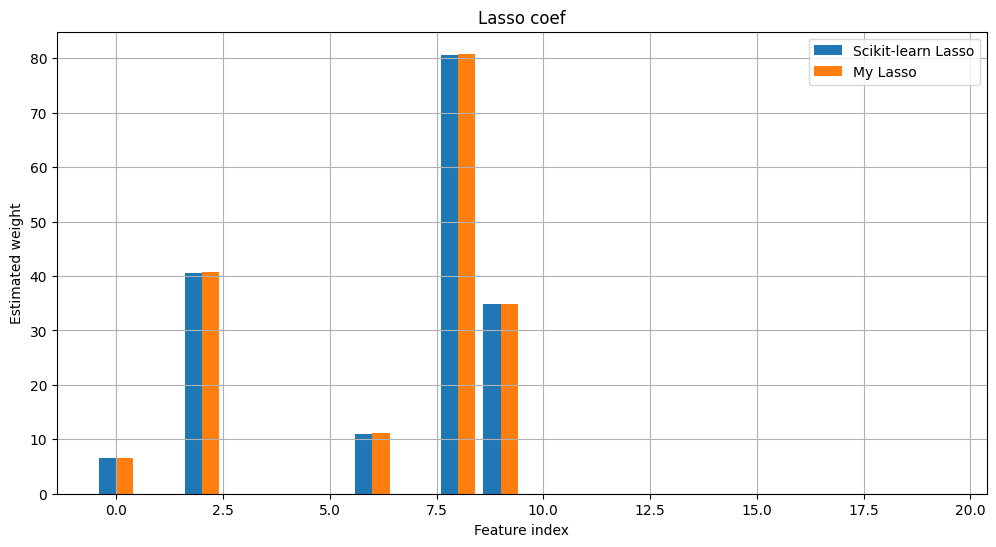

In [6]:
# 結果の比較
print("\n実装の差異:")
print("係数の差のノルム:", np.linalg.norm(lasso.coef_ - coef_my))
print("切片の差:", abs(lasso.intercept_ - intercept_my))
print("MSEの差:", abs(mse_sklearn - mse_my))


# 係数の比較
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(lasso.coef_)) - 0.2, lasso.coef_, width=0.4, label='Scikit-learn Lasso')
plt.bar(np.arange(len(coef_my)) + 0.2, coef_my, width=0.4, label='My Lasso')
plt.xlabel('Feature index')
plt.ylabel('Estimated weight')
plt.title('Lasso coef')
plt.legend()
plt.grid(True)
plt.show()